In [89]:
binarize = False
model_type = "regression"
remove_trend = True
lag_features = True

save_model = True
model_name = "XGBReg"
parameters = "lagfeatures_removetrend"

In [90]:
import pandas as pd
from src.models import build_model
from src.processing import process_features,process_target
from src.evaluation import evaluate

# Inport SVR model
from sklearn.svm import SVR

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [91]:
x_train = pd.read_csv("data/x_train.csv", index_col= 'DELIVERY_START', parse_dates=True)
y_train = pd.read_csv("data/y_train.csv", index_col= 'DELIVERY_START', parse_dates=True)
x_test = pd.read_csv("data/x_test.csv", index_col= 'DELIVERY_START', parse_dates=True)

proc_x_train, proc_x_test = process_features(x_train,x_test,remove_trend=remove_trend, lag_features=lag_features)
proc_y_train = process_target(y_train, binarize=binarize)

## Evaluation

/mnt/windows/Users/tmdu1/Documents/Thomas/ENS/M2/Cours/Echantillonnage/data_challenge_elmy/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/mnt/windows/Users/tmdu1/Documents/Thomas/ENS/M2/Cours/Echantillonnage/data_challenge_elmy/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/mnt/windows/Users/tmdu1/Documents/Thomas/ENS/M2/Cours/Echantillonnage/data_challenge_elmy/.venv/lib/python3.11/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


0.4953243


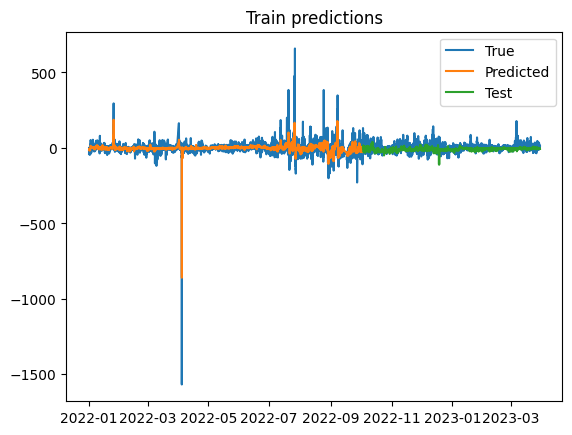

In [92]:
# Split data
from sklearn.model_selection import train_test_split
# x_train_eval, x_test_eval, y_train_eval, y_test_eval = train_test_split(proc_x_train, y_train, test_size=0.2, random_state=42)
N_train = int(len(proc_x_train)*0.6)
x_train_eval, x_test_eval = process_features(x_train[:N_train], x_train[N_train:])
y_train_eval, y_test_eval = y_train[:N_train], y_train[N_train:]
y_train_eval = process_target(y_train_eval, binarize=binarize)

# Train model
model = build_model(type=model_type)
model.fit(x_train_eval, y_train_eval)

# Evaluate model
print(evaluate(model, x_test_eval, y_test_eval))

# Visualize predictions
import matplotlib.pyplot as plt
y_train_pred = model.predict(x_train_eval)
y_test_pred = model.predict(x_test_eval)

# Plot predictions
plt.plot(y_train.index, y_train, label='True')
plt.plot(x_train_eval.index, y_train_pred, label='Predicted')
plt.plot(x_test_eval.index, y_test_pred, label='Test')
plt.title('Train predictions')
plt.legend()
plt.show()


## Prepare submission

In [93]:
# Fit with full data
model = build_model(type=model_type)
model.fit(proc_x_train, proc_y_train);

In [94]:
if save_model:
    from datetime import datetime
    y_test_pred = model.predict(proc_x_test)
    y_test_pred = pd.DataFrame(y_test_pred, index=x_test.index, columns=['spot_id_delta'])
    y_test_pred.to_csv(f'submission/{datetime.today().date()}_{model_name}_{parameters}.csv', index=True)